In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
# generate all matrices and their inverses, since not all matrices can be inverted

In [118]:
np.random.seed(55)
matList = [np.random.random_sample((3,3))]

In [119]:
i = 1
while i < 13501:
  mat = np.random.random_sample((3,3))
  mat[2,2] = mat[0,0]
  mat[1,2] = mat[0,1]
  mat[2,1] = mat[1,0]
  matList.append(np.random.randint(0,20, (3,3)))
  i += 1

In [120]:
len(matList)

13501

In [121]:
invList = []
for x in matList:
    try:
        inverse = np.linalg.inv(x)
        invList.append([x, inverse])
    except np.linalg.LinAlgError:
    # Not invertible. Skip this one.
        pass

In [122]:
len(invList) #the number of matrices that can be inverted

13490

In [123]:
# so we have 1417 out of 1501 matrices

In [124]:
# dont worry about a formula for finding the inverse of a matrix but use 
# linear regression for each element of the inverted matrix as a formula from 
# each element of the original matrix and look for a relationship

In [125]:
#convert to dataframe
df = pd.DataFrame(data=invList)
df.columns = ['original', 'inverse']

In [126]:
for i in [0,1,2]:
    for j in [0,1,2]:
        df['original'+str(i)+str(j)] = df.apply(lambda row: row['original'][i][j], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        df['inverse'+str(i)+str(j)] = df.apply(lambda row: row['inverse'][i][j], axis=1)
df

,original,inverse,original00,original01,original02,original10,original11,original12,original20,original21,original22,inverse00,inverse01,inverse02,inverse10,inverse11,inverse12,inverse20,inverse21,inverse22
0,"[[0.093108286671858, 0.9716559199897875, 0.483...","[[37.962284530916676, -70.76159498408224, 16.9...",0.093108,0.971656,0.48386,0.242523,0.531124,0.285544,0.86263,0.0411,0.108348,37.962285,-70.761595,16.955918,182.346268,-337.527800,75.212057,-371.414131,691.417744,-154.298723
1,"[[11, 13, 18], [17, 16, 14], [10, 9, 12]]","[[-0.28448275862068967, -0.025862068965517244,...",11.000000,13.000000,18.00000,17.000000,16.000000,14.000000,10.00000,9.0000,12.000000,-0.284483,-0.025862,0.456897,0.275862,0.206897,-0.655172,0.030172,-0.133621,0.193966
2,"[[18, 10, 0], [10, 3, 7], [18, 1, 19]]","[[0.1923076923076924, -0.7307692307692312, 0.2...",18.000000,10.000000,0.00000,10.000000,3.000000,7.000000,18.00000,1.0000,19.000000,0.192308,-0.730769,0.269231,-0.246154,1.315385,-0.484615,-0.169231,0.623077,-0.176923
3,"[[16, 3, 7], [13, 2, 16], [8, 19, 14]]","[[0.09321175278622088, -0.030732860520094565, ...",16.000000,3.000000,7.00000,13.000000,2.000000,16.000000,8.00000,19.0000,14.000000,0.093212,-0.030733,-0.011483,0.018237,-0.056738,0.055724,-0.078014,0.094563,0.002364
4,"[[5, 11, 3], [6, 18, 18], [6, 13, 0]]","[[3.250000000000005, -0.5416666666666675, -2.0...",5.000000,11.000000,3.00000,6.000000,18.000000,18.000000,6.00000,13.0000,0.000000,3.250000,-0.541667,-2.000000,-1.500000,0.250000,1.000000,0.416667,-0.013889,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13485,"[[13, 19, 2], [17, 3, 4], [15, 15, 13]]","[[0.00721153846153846, 0.07451923076923077, -0...",13.000000,19.000000,2.00000,17.000000,3.000000,4.000000,15.00000,15.0000,13.000000,0.007212,0.074519,-0.024038,0.055288,-0.047734,0.006181,-0.072115,-0.030907,0.097527
13486,"[[4, 7, 0], [8, 14, 13], [15, 15, 15]]","[[0.02564102564102564, -0.1794871794871795, 0....",4.000000,7.000000,0.00000,8.000000,14.000000,13.000000,15.00000,15.0000,15.000000,0.025641,-0.179487,0.155556,0.128205,0.102564,-0.088889,-0.153846,0.076923,-0.000000
13487,"[[7, 6, 1], [9, 11, 5], [17, 13, 14]]","[[0.28990228013029323, -0.231270358306189, 0.0...",7.000000,6.000000,1.00000,9.000000,11.000000,5.000000,17.00000,13.0000,14.000000,0.289902,-0.231270,0.061889,-0.133550,0.263844,-0.084691,-0.228013,0.035831,0.074919
13488,"[[5, 2, 16], [1, 14, 3], [16, 8, 1]]","[[0.0029308323563892154, -0.03692848769050411,...",5.000000,2.000000,16.00000,1.000000,14.000000,3.000000,16.00000,8.0000,1.000000,0.002931,-0.036928,0.063892,-0.013775,0.073564,-0.000293,0.063306,0.002345,-0.019930


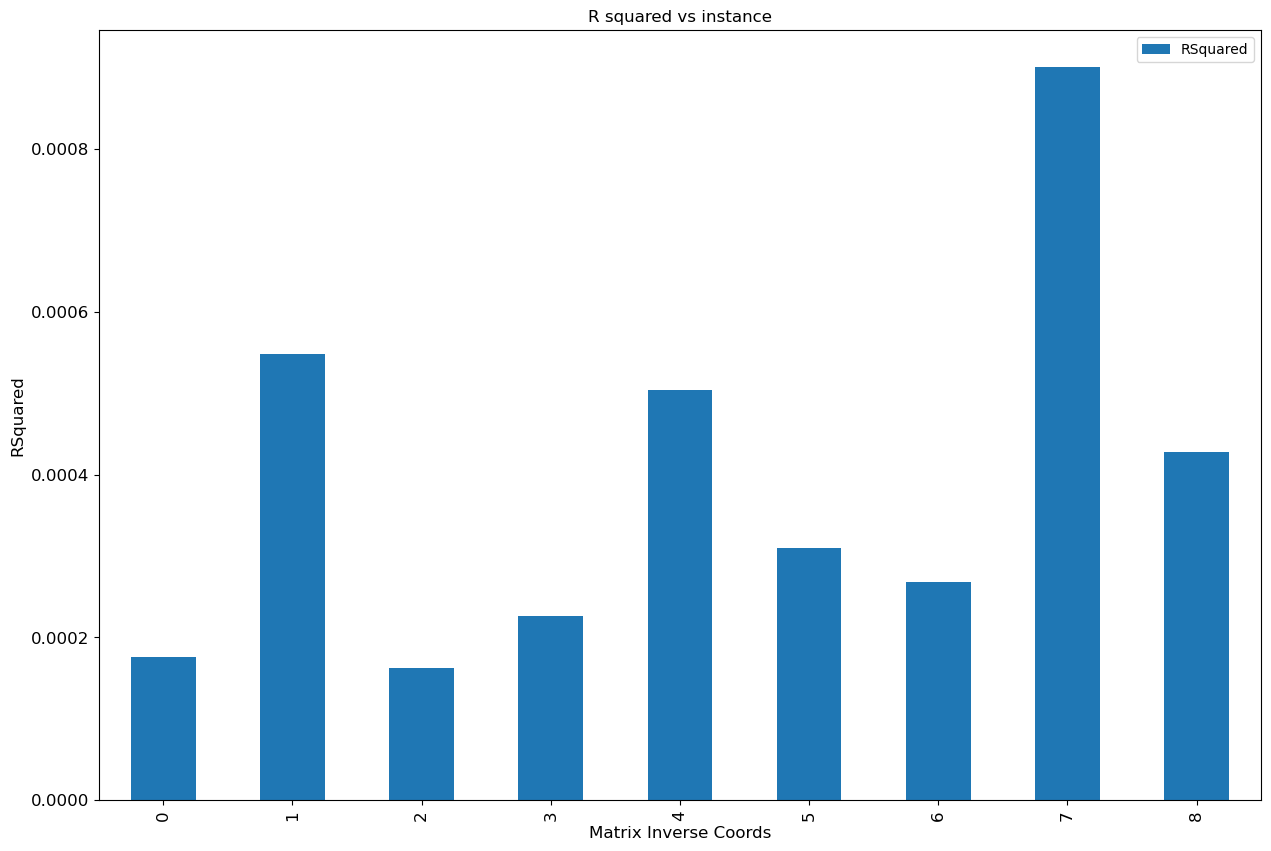

0.0003913009030378624

In [127]:
import statsmodels.api as sm

coords = []
fit = []

dflm = df.copy()

for i in (0,1,2):
    for j in (0,1,2):
        dflm = df.copy()
        y = dflm['inverse'+str(i)+str(j)]
        dflm.drop('original', axis=1, inplace=True)
        dflm.drop('inverse', axis=1, inplace=True)
        dflm.drop('inverse00', axis=1, inplace=True)
        dflm.drop('inverse01', axis=1, inplace=True)
        dflm.drop('inverse02', axis=1, inplace=True)
        dflm.drop('inverse10', axis=1, inplace=True)
        dflm.drop('inverse11', axis=1, inplace=True)
        dflm.drop('inverse12', axis=1, inplace=True)
        dflm.drop('inverse20', axis=1, inplace=True)
        dflm.drop('inverse21', axis=1, inplace=True)
        dflm.drop('inverse22', axis=1, inplace=True)
        X = dflm[dflm.columns]
        X_withconstant = X
        lm = sm.OLS(y,X_withconstant)
        fit.append([ str(i)+" "+str(j),lm.fit().rsquared])
        
import matplotlib.pyplot as plt
ax = pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).plot(kind='bar', title ="R squared vs instance", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Matrix Inverse Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].mean()

In [128]:
#the first corner of the inverse matrix does not have a linear relationship with other components

In [129]:
df = pd.DataFrame(data=invList)
df.columns = ['original', 'inverse']

for i in [0,1,2]:
    for j in [0,1,2]:
        df['original'+str(i)+str(j)] = df.apply(lambda row: row['original'][i][j], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        df['inverse'+str(i)+str(j)] = df.apply(lambda row: row['inverse'][i][j], axis=1)

dflm = df.copy()
y = dflm['inverse01']
dflm.drop('inverse00', axis=1, inplace=True)
dflm.drop('inverse01', axis=1, inplace=True)
dflm.drop('inverse02', axis=1, inplace=True)
dflm.drop('inverse10', axis=1, inplace=True)
dflm.drop('inverse11', axis=1, inplace=True)
dflm.drop('inverse12', axis=1, inplace=True)
dflm.drop('inverse20', axis=1, inplace=True)
dflm.drop('inverse21', axis=1, inplace=True)
dflm.drop('inverse22', axis=1, inplace=True)
dflm.drop('original', axis=1, inplace=True)
dflm.drop('inverse', axis=1, inplace=True)
X = dflm[dflm.columns]
X_withconstant = X
lm_00 = sm.OLS(y,X_withconstant)
lm_00_results = lm_00.fit()
lm_00_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              inverse01   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.8210
Date:                Fri, 19 Jan 2024   Prob (F-statistic):                       0.597
Time:                        06:37:31   Log-Likelihood:                     -4.5722e+05
No. Observations:               13490   AIC:                                  9.145e+05
Df Residuals:                   13481   BIC:                                  9.145e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
original00  2.756e+10    1.8e+11      0.153      0.878   -3.25e+11     3.8e+11
original01  5.801e+10   1.79e+11      0.323      0.746   -2.94e+11     4.1e+11
original02  1.019e+11   1.79e+11      0.571      0.568   -2.48e+11    4.52e+11
original10  1.096e+11   1.79e+11      0.613      0.540   -2.41e+11     4.6e+11
original11 -3.701e+10   1.79e+11     -0.206      0.837   -3.89e+11    3.15e+11
original12  1.366e+11   1.79e+11      0.762      0.446   -2.15e+11    4.88e+11
original20 -1.544e+11   1.79e+11     -0.864      0.387   -5.05e+11    1.96e+11
original21 -2.708e+11    1.8e+11     -1.507      0.132   -6.23e+11    8.15e+10
original22 -1.631e+11   1.79e+11     -0.914      0.361   -5.13e+11    1.87e+11
==============================================================================
Omnibus:                    43016.195   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6436673043.249
Skew:                         -51.805   Prob(JB):                         0.00
Kurtosis:                    3385.414   Cond. No.                         5.10
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
# inverse 1 0 coefficients for linear regression are quite unreasonable

In [131]:
# consider linear combinations of multipying all combinations of two items

dflm = pd.DataFrame(data=invList)
dflm.columns = ['original', 'inverse']

for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['inverse'+str(i)+str(j)] = dflm.apply(lambda row: row['inverse'][i][j], axis=1)

        

for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original00x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][0], axis=1)
dflm = dflm.drop('original00x00', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original01x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][1], axis=1)
dflm = dflm.drop('original01x01', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original02x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][2], axis=1)
dflm = dflm.drop('original02x02', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original10x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][0], axis=1)
dflm = dflm.drop('original10x10', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original11x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][1], axis=1)
dflm = dflm.drop('original11x11', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original12x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][2], axis=1)
dflm = dflm.drop('original12x12', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original20x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][0], axis=1)
dflm = dflm.drop('original20x20', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original21x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][1], axis=1)
dflm = dflm.drop('original21x21', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original22x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][2], axis=1)
dflm = dflm.drop('original22x22', axis=1)
  

In [132]:
dflm

,original,inverse,original00,original01,original02,original10,original11,original12,original20,original21,...,original21x20,original21x22,original22x00,original22x01,original22x02,original22x10,original22x11,original22x12,original22x20,original22x21
0,"[[0.093108286671858, 0.9716559199897875, 0.483...","[[37.962284530916676, -70.76159498408224, 16.9...",0.093108,0.971656,0.48386,0.242523,0.531124,0.285544,0.86263,0.0411,...,0.035454,0.004453,0.010088,0.105277,0.052425,0.026277,0.057546,0.030938,0.093464,0.004453
1,"[[11, 13, 18], [17, 16, 14], [10, 9, 12]]","[[-0.28448275862068967, -0.025862068965517244,...",11.000000,13.000000,18.00000,17.000000,16.000000,14.000000,10.00000,9.0000,...,90.000000,108.000000,132.000000,156.000000,216.000000,204.000000,192.000000,168.000000,120.000000,108.000000
2,"[[18, 10, 0], [10, 3, 7], [18, 1, 19]]","[[0.1923076923076924, -0.7307692307692312, 0.2...",18.000000,10.000000,0.00000,10.000000,3.000000,7.000000,18.00000,1.0000,...,18.000000,19.000000,342.000000,190.000000,0.000000,190.000000,57.000000,133.000000,342.000000,19.000000
3,"[[16, 3, 7], [13, 2, 16], [8, 19, 14]]","[[0.09321175278622088, -0.030732860520094565, ...",16.000000,3.000000,7.00000,13.000000,2.000000,16.000000,8.00000,19.0000,...,152.000000,266.000000,224.000000,42.000000,98.000000,182.000000,28.000000,224.000000,112.000000,266.000000
4,"[[5, 11, 3], [6, 18, 18], [6, 13, 0]]","[[3.250000000000005, -0.5416666666666675, -2.0...",5.000000,11.000000,3.00000,6.000000,18.000000,18.000000,6.00000,13.0000,...,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13485,"[[13, 19, 2], [17, 3, 4], [15, 15, 13]]","[[0.00721153846153846, 0.07451923076923077, -0...",13.000000,19.000000,2.00000,17.000000,3.000000,4.000000,15.00000,15.0000,...,225.000000,195.000000,169.000000,247.000000,26.000000,221.000000,39.000000,52.000000,195.000000,195.000000
13486,"[[4, 7, 0], [8, 14, 13], [15, 15, 15]]","[[0.02564102564102564, -0.1794871794871795, 0....",4.000000,7.000000,0.00000,8.000000,14.000000,13.000000,15.00000,15.0000,...,225.000000,225.000000,60.000000,105.000000,0.000000,120.000000,210.000000,195.000000,225.000000,225.000000
13487,"[[7, 6, 1], [9, 11, 5], [17, 13, 14]]","[[0.28990228013029323, -0.231270358306189, 0.0...",7.000000,6.000000,1.00000,9.000000,11.000000,5.000000,17.00000,13.0000,...,221.000000,182.000000,98.000000,84.000000,14.000000,126.000000,154.000000,70.000000,238.000000,182.000000
13488,"[[5, 2, 16], [1, 14, 3], [16, 8, 1]]","[[0.0029308323563892154, -0.03692848769050411,...",5.000000,2.000000,16.00000,1.000000,14.000000,3.000000,16.00000,8.0000,...,128.000000,8.000000,5.000000,2.000000,16.000000,1.000000,14.000000,3.000000,16.000000,8.000000


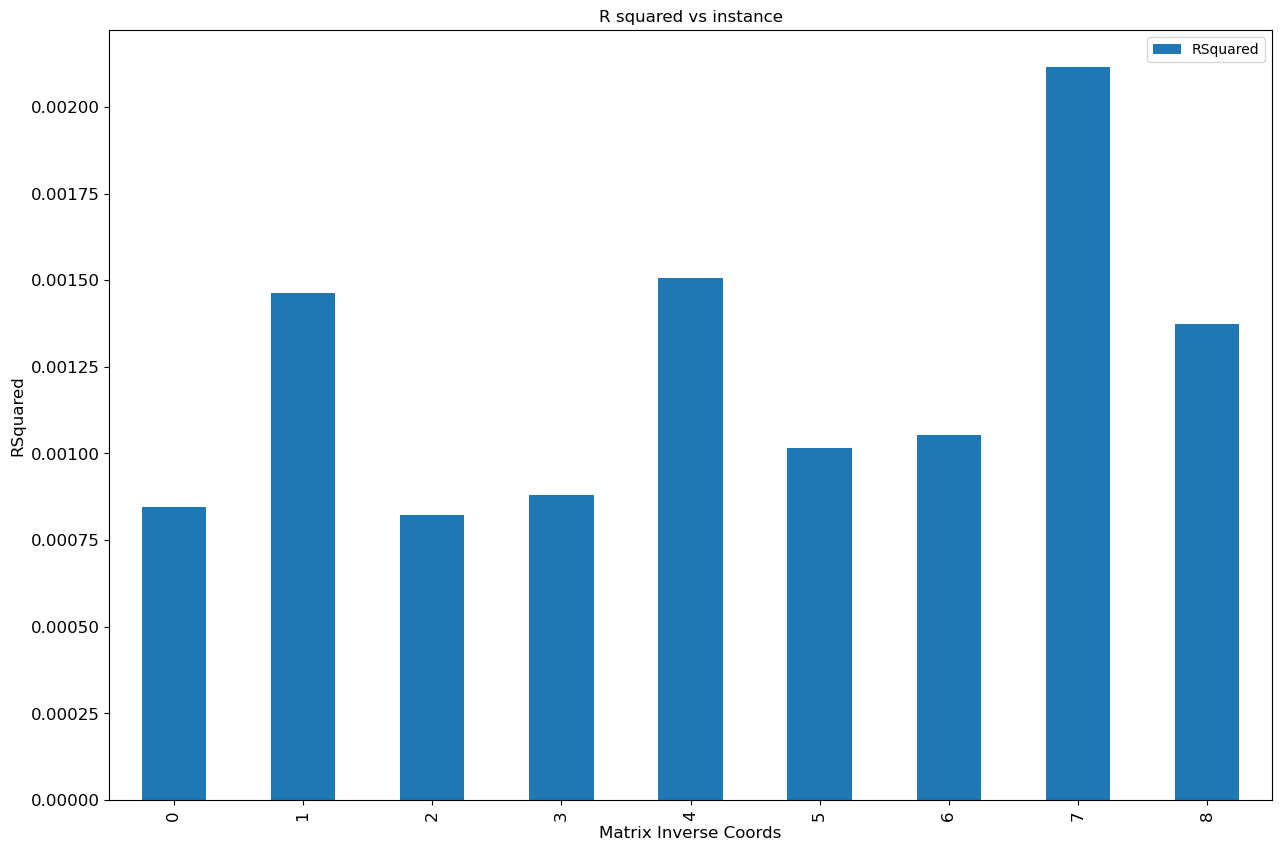

0.001230263352216358

In [133]:
coords = []
fit = []

dflm2 = dflm.copy()

for i in (0,1,2):
    for j in (0,1,2):
        dfl = dflm2.copy()
        y = dfl['inverse'+str(i)+str(j)]
        dfl.drop('original', axis=1, inplace=True)
        dfl.drop('inverse', axis=1, inplace=True)
        dfl.drop('inverse00', axis=1, inplace=True)
        dfl.drop('inverse01', axis=1, inplace=True)
        dfl.drop('inverse02', axis=1, inplace=True)
        dfl.drop('inverse10', axis=1, inplace=True)
        dfl.drop('inverse11', axis=1, inplace=True)
        dfl.drop('inverse12', axis=1, inplace=True)
        dfl.drop('inverse20', axis=1, inplace=True)
        dfl.drop('inverse21', axis=1, inplace=True)
        dfl.drop('inverse22', axis=1, inplace=True)
        X = dfl[dfl.columns]
        X_withconstant = X
        lm = sm.OLS(y,X_withconstant)
        fit.append([ str(i)+" "+str(j),lm.fit().rsquared])
        
import matplotlib.pyplot as plt
ax = pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).plot(kind='bar', title ="R squared vs instance", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Matrix Inverse Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].mean()

In [134]:
# when adding the combinations of multiplication of two matrix elements to the linear regression the average r squared value 
# increases from 0.0039 to 0.016 which is quite significant

In [135]:
# unfortunately the average r sqaured value is way to low to be able to determine the inverse of a matrix by linear regression

In [136]:
# this is expected although it is a neat result to see how the average r sqaured value significantly increased by adding the 
# combinations of multiplying two matrix elements

In [137]:
# consider linear combinations of multipying all combinations of two items, along with the square of each element in the matrix

dflm = pd.DataFrame(data=invList)
dflm.columns = ['original', 'inverse']

for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['inverse'+str(i)+str(j)] = dflm.apply(lambda row: row['inverse'][i][j], axis=1)

        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original00x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][0], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original01x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original02x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][2], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original10x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][0], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original11x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original12x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][2], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original20x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][0], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original21x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original22x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][2], axis=1)
  

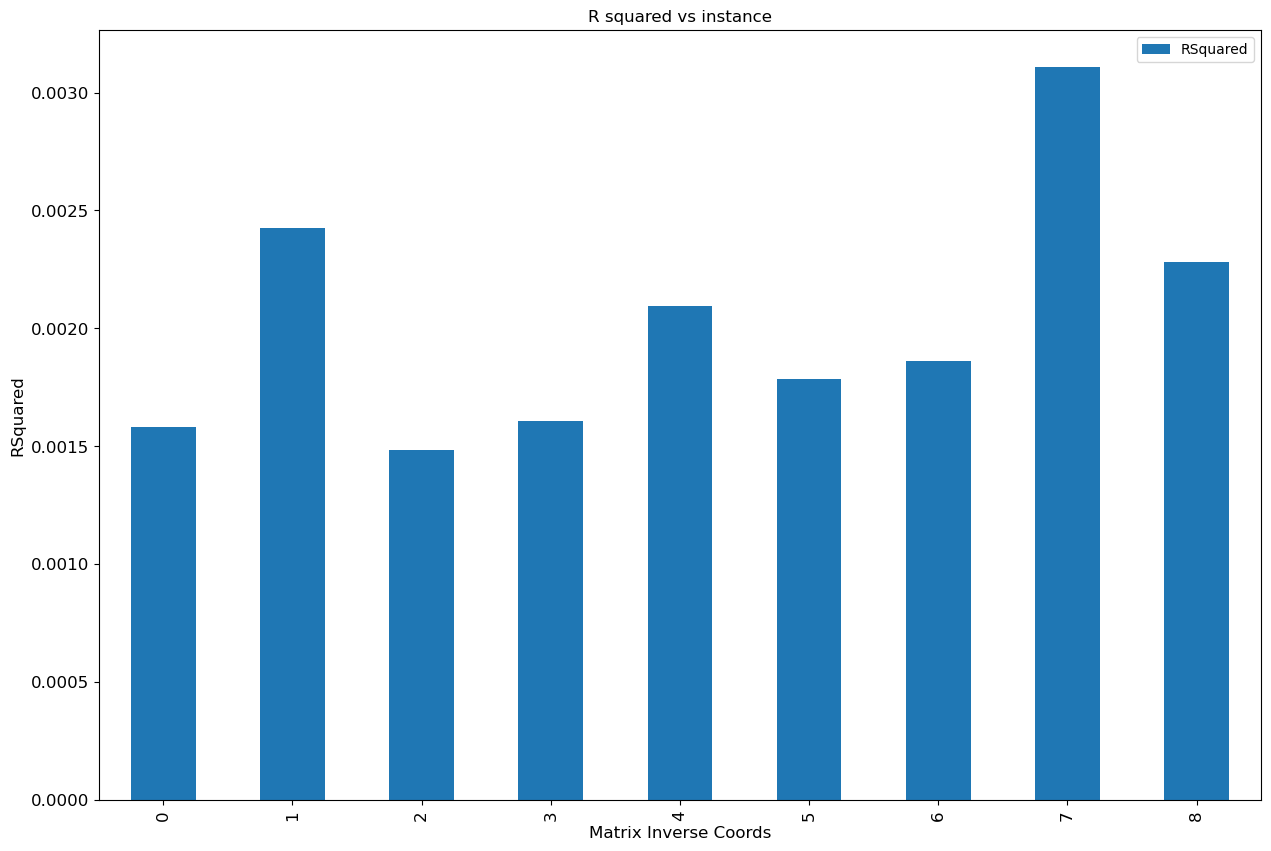

0.0020261476735648426

In [138]:
coords = []
fit = []

dflm2 = dflm.copy()

for i in (0,1,2):
    for j in (0,1,2):
        dfl = dflm2.copy()
        y = dfl['inverse'+str(i)+str(j)]
        dfl.drop('original', axis=1, inplace=True)
        dfl.drop('inverse', axis=1, inplace=True)
        dfl.drop('inverse00', axis=1, inplace=True)
        dfl.drop('inverse01', axis=1, inplace=True)
        dfl.drop('inverse02', axis=1, inplace=True)
        dfl.drop('inverse10', axis=1, inplace=True)
        dfl.drop('inverse11', axis=1, inplace=True)
        dfl.drop('inverse12', axis=1, inplace=True)
        dfl.drop('inverse20', axis=1, inplace=True)
        dfl.drop('inverse21', axis=1, inplace=True)
        dfl.drop('inverse22', axis=1, inplace=True)
        X = dfl[dfl.columns]
        X_withconstant = X
        lm = sm.OLS(y,X_withconstant)
        fit.append([ str(i)+" "+str(j),lm.fit().rsquared])
        
import matplotlib.pyplot as plt
ax = pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).plot(kind='bar', title ="R squared vs instance", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Matrix Inverse Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].mean()

In [139]:
#very interesting, the average r squared value increases by 6% when the square of each element to the linear regression

In [140]:
# consider linear combinations of multipying all combinations of two items, along with the square of each element in the matrix

dflm = pd.DataFrame(data=invList)
dflm.columns = ['original', 'inverse']

for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['inverse'+str(i)+str(j)] = dflm.apply(lambda row: row['inverse'][i][j], axis=1)

        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original00x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][0] * row['original'][0][0] , axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original01x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][1] * row['original'][0][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original02x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][2] * row['original'][0][2], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original10x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][0] * row['original'][1][0], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original11x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][1] * row['original'][1][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original12x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][2] * row['original'][1][2], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original20x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][0] * row['original'][2][0], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original21x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][1] * row['original'][2][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original22x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][2] * row['original'][1][2], axis=1)
  

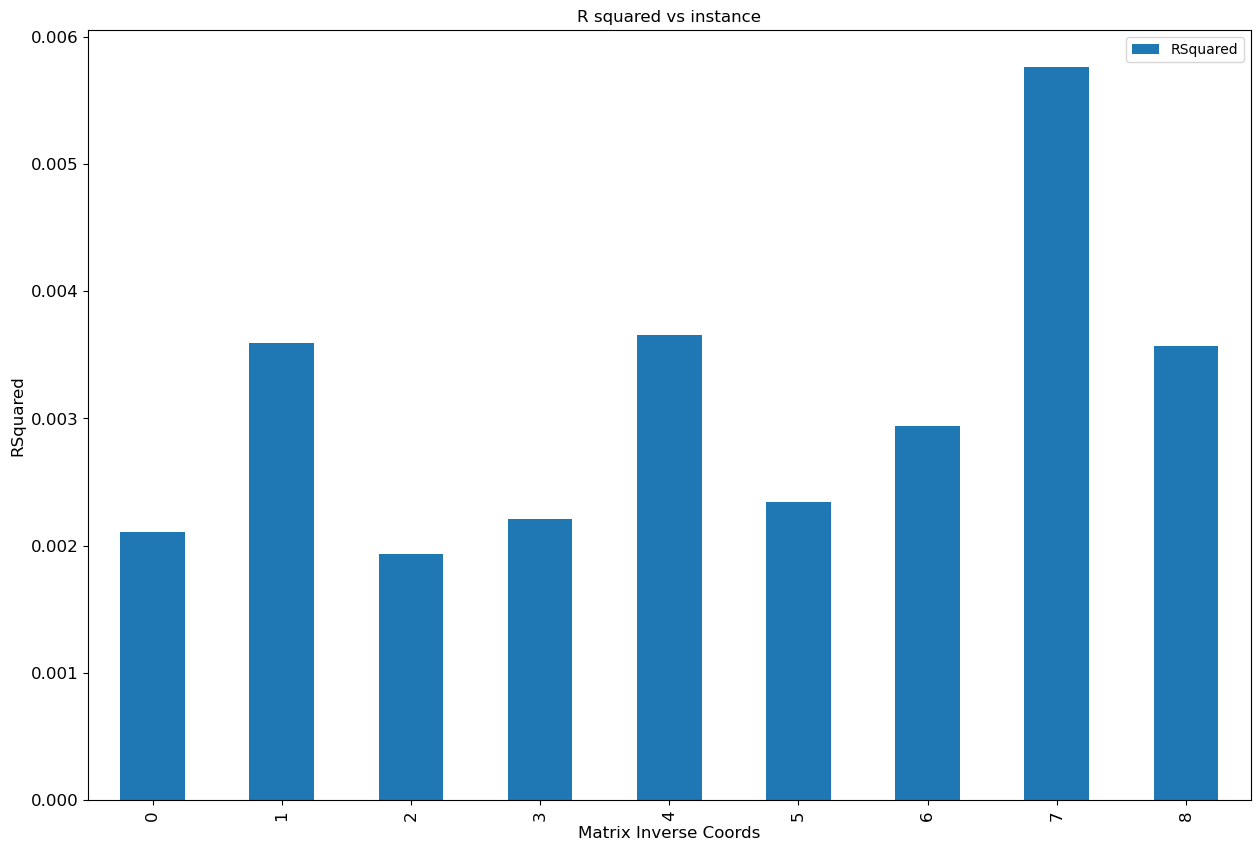

0.003124268685337883

In [141]:
coords = []
fit = []

dflm2 = dflm.copy()

for i in (0,1,2):
    for j in (0,1,2):
        dfl = dflm2.copy()
        y = dfl['inverse'+str(i)+str(j)]
        dfl.drop('original', axis=1, inplace=True)
        dfl.drop('inverse', axis=1, inplace=True)
        dfl.drop('inverse00', axis=1, inplace=True)
        dfl.drop('inverse01', axis=1, inplace=True)
        dfl.drop('inverse02', axis=1, inplace=True)
        dfl.drop('inverse10', axis=1, inplace=True)
        dfl.drop('inverse11', axis=1, inplace=True)
        dfl.drop('inverse12', axis=1, inplace=True)
        dfl.drop('inverse20', axis=1, inplace=True)
        dfl.drop('inverse21', axis=1, inplace=True)
        dfl.drop('inverse22', axis=1, inplace=True)
        X = dfl[dfl.columns]
        X_withconstant = X
        lm = sm.OLS(y,X_withconstant)
        fit.append([ str(i)+" "+str(j),lm.fit().rsquared])
        
import matplotlib.pyplot as plt
ax = pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).plot(kind='bar', title ="R squared vs instance", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Matrix Inverse Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].mean()